# 0. Prequisite
## Perform the following steps before trying the exercises:

### a) Import pandas as "pd" and load the lab1 dataset into "df".
### b) Print dataset information to refresh your memory.
### c) Run preprocess_data function on the dataframe to perform preprocessing steps discussed last week.
### d) Split your data into training and test with 70:30 distribution, stratified, random state 0.

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('lab1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TargetB           9686 non-null   int64  
 1   ID                9686 non-null   int64  
 2   TargetD           4843 non-null   float64
 3   GiftCnt36         9686 non-null   int64  
 4   GiftCntAll        9686 non-null   int64  
 5   GiftCntCard36     9686 non-null   int64  
 6   GiftCntCardAll    9686 non-null   int64  
 7   GiftAvgLast       9686 non-null   float64
 8   GiftAvg36         9686 non-null   float64
 9   GiftAvgAll        9686 non-null   float64
 10  GiftAvgCard36     7906 non-null   float64
 11  GiftTimeLast      9686 non-null   int64  
 12  GiftTimeFirst     9686 non-null   int64  
 13  PromCnt12         9686 non-null   int64  
 14  PromCnt36         9686 non-null   int64  
 15  PromCntAll        9686 non-null   int64  
 16  PromCntCard12     9686 non-null   int64  


In [3]:
def preprocess_data(df):
    
    # Week 1
    # 3.1 Setting correct type to variables
    df.DemCluster = df.DemCluster.astype('category')
    df.DemHomeOwner = df.DemHomeOwner.replace({'H': 1,'U':0})
    # 3.2 Correcting invalid values
    df.DemAge = df.DemAge.mask(df.DemAge == 0, df.DemAge.mean(skipna=True))
    df.DemMedHomeValue = df.DemMedHomeValue.mask(df.DemMedHomeValue == 0, df.DemMedHomeValue.mean(skipna=True))
    # 3.3 Imputing Missing Values
    df.DemAge.fillna(df.DemAge.mean(), inplace = True)
    df.DemMedHomeValue.fillna(df.DemMedHomeValue.mean(), inplace = True)
    df.GiftAvgCard36.fillna(df.GiftAvgCard36.mean(), inplace = True)
    # 3.4 Dropping Unnecessary Variables
    df.drop(['ID', 'TargetD'], axis=1, inplace=True)
    # 3.5 Formatting Categorical Variable
    df.DemHomeOwner = df.DemHomeOwner.astype('category')
    df.DemGender = df.DemGender.astype('category')
    
    # Week 2
    # make copies of features & target data from
    df_features = df.drop(['TargetB'], axis=1)
    df_target = df[['TargetB']]
    # convert categorial data
    label_encoder = preprocessing.LabelEncoder()
    df_features['StatusCat96NK'] = label_encoder.fit_transform(df_features['StatusCat96NK'])
    df_features['DemGender'] = label_encoder.fit_transform(df_features['DemGender'])
    # split the data into training & test sets
    
    return(
        df_features.columns,
        df_target.columns,
        train_test_split(
        df_features.values, df_target.values, 
        stratify = df_target.values, random_state = 0, test_size=0.30
    ))
    

In [4]:
x_col, y_col, (x_train, x_test, y_train, y_test) = preprocess_data(df)

# 1. Standardisation and Logistic Regression
## Perform following operations and answer the following questions:

### a) What is the difference between logistic regression and linear regression?

Linear Regression is used to solve regression problems in which the dependent/output variable is countinuous/descrete. While Logistic Regression is used to solve classification problems where the dependent/output variable is binary.

### b) Describe how logistic regression perform its prediction.

Similar to Linear Regression, a linear function (formed by the independent variables and their correlation) is produced, with modification in such a way that, instead of being a linear function, it's part of a logistic function, so that the result is always between 0 and 1.

### c) Write code to perform standardisation on your training and test dataset. 





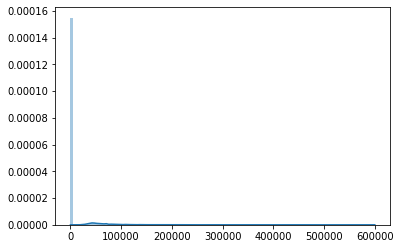

In [5]:
# Before Standardization
sns.distplot(x_train, bins = 100)

In [6]:
x_train

array([[2, 4, 1, ..., 136400.0, 3, 0],
       [2, 8, 1, ..., 344300.0, 24, 0],
       [1, 6, 1, ..., 68200.0, 35, 42011],
       ...,
       [1, 1, 1, ..., 38300.0, 27, 41324],
       [2, 2, 1, ..., 190000.0, 28, 0],
       [3, 24, 2, ..., 50000.0, 24, 0]], dtype=object)

In [7]:
scaler = preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 


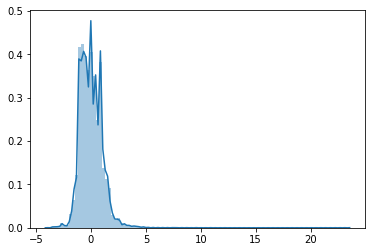

In [8]:
# After Standardization
sns.distplot(x_train, bins = 100)

In [9]:
x_train

array([[-0.56968888, -0.71376787, -0.5353033 , ...,  0.25653975,
        -2.41101505, -1.41429318],
       [-0.56968888, -0.27593686, -0.5353033 , ...,  2.39963659,
        -0.57092241, -1.41429318],
       [-1.03838085, -0.49485236, -0.5353033 , ..., -0.44648672,
         0.39293564,  0.05775913],
       ...,
       [-1.03838085, -1.04214112, -0.5353033 , ..., -0.75470508,
        -0.30805203,  0.03368686],
       [-0.56968888, -0.93268337, -0.5353033 , ...,  0.80906496,
        -0.22042857, -1.41429318],
       [-0.1009969 ,  1.47538718,  0.08840462, ..., -0.6340979 ,
        -0.57092241, -1.41429318]])

### d) What does standardisation do to your data? How does it benefit your regression model? 

Standardisation transforms the features so that the mean is always zero and scaled to have standard deviation of one. As such, the distribution of the features values becomes more normal distributed. With the same mean and unit scale, we can compare features to features directly. 

### e) Write code to fit a logistic regression model to your training data. How does it perform on the training and test data? Do you see any indication of overfitting?

No sign of overfitting. The training set and test set accuracy are quite close.



In [10]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# Check the accurary
print(
    'Training Set Accuracy: {:.4f}'. 
    format(logistic_regression.score(x_train, y_train))
)

print(
    'Test Set Accuracy: {:.4f}'.
    format(logistic_regression.score(x_test, y_test))
)


Training Set Accuracy: 0.5801
Test Set Accuracy: 0.5850


/home/kitlim/py3_kernel/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



### f) Write code to find the most important features in your model.



In [11]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = pd.DataFrame({
    'feature': x_col,
    'importance': logistic_regression.coef_[0]
})

importances.sort_values('importance', ascending = False).head()

,feature,importance
9,GiftTimeFirst,0.250808
22,DemMedHomeValue,0.121731
2,GiftCntCard36,0.120540
12,PromCntAll,0.115006
14,PromCntCard36,0.093456
